In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

### Load Flights Data Set

In [3]:
df = pd.read_csv("flight_status_in_2019.csv", index_col=None, 
                 low_memory=False)

### Exploratory Data Analysis

In [4]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,2019,1,16,3,2019-01-16,AA,N150UW,544,BOS,PHL,...,78.0,61.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,17,4,2019-01-17,AA,N563UW,544,BOS,PHL,...,97.0,66.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,18,5,2019-01-18,AA,N921US,544,BOS,PHL,...,90.0,66.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,19,6,2019-01-19,AA,N604AW,544,BOS,PHL,...,98.0,64.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,20,7,2019-01-20,AA,N975UY,544,BOS,PHL,...,NaN,NaN,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
8091679,2019,12,26,4,2019-12-26,AA,N947NN,1583,PHX,ORD,...,185.0,159.0,1.0,1440.0,3.0,0.0,0.0,0.0,12.0,NaN
8091680,2019,12,27,5,2019-12-27,AA,N962AN,1583,PHX,ORD,...,185.0,163.0,1.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN
8091681,2019,12,28,6,2019-12-28,AA,N946AN,1583,PHX,ORD,...,204.0,178.0,1.0,1440.0,4.0,0.0,0.0,0.0,38.0,NaN
8091682,2019,12,29,7,2019-12-29,AA,N801NN,1583,PHX,ORD,...,190.0,168.0,1.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN
8091683,2019,12,30,1,2019-12-30,AA,N843NN,1583,PHX,ORD,...,207.0,183.0,1.0,1440.0,3.0,0.0,3.0,0.0,16.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091684 entries, 0 to 8091683
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY_OF_MONTH         int64  
 3   DAY_OF_WEEK          int64  
 4   FL_DATE              object 
 5   OP_UNIQUE_CARRIER    object 
 6   TAIL_NUM             object 
 7   OP_CARRIER_FL_NUM    int64  
 8   ORIGIN               object 
 9   DEST                 object 
 10  CRS_DEP_TIME         int64  
 11  DEP_TIME             float64
 12  DEP_DELAY            float64
 13  CRS_ARR_TIME         int64  
 14  ARR_TIME             float64
 15  ARR_DELAY            float64
 16  CANCELLED            float64
 17  CANCELLATION_CODE    object 
 18  DIVERTED             float64
 19  CRS_ELAPSED_TIME     float64
 20  ACTUAL_ELAPSED_TIME  float64
 21  AIR_TIME             float64
 22  FLIGHTS              float64
 23  DISTANCE             float64
 24

In [7]:
df.shape

(8091684, 30)

In [8]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
TAIL_NUM                 28514
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                147894
DEP_DELAY               147918
CRS_ARR_TIME                 0
ARR_TIME                156916
ARR_DELAY               174420
CANCELLED                    0
CANCELLATION_CODE      7938055
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     174420
AIR_TIME                174420
FLIGHTS                      0
DISTANCE                     0
CARRIER_DELAY          6564229
WEATHER_DELAY          6564229
NAS_DELAY              6564229
SECURITY_DELAY         6564229
LATE_AIRCRAFT_DELAY    6564229
Unnamed: 29            8091684
dtype: int64

In [9]:
df_corr = df.corr()

In [10]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

<AxesSubplot:>

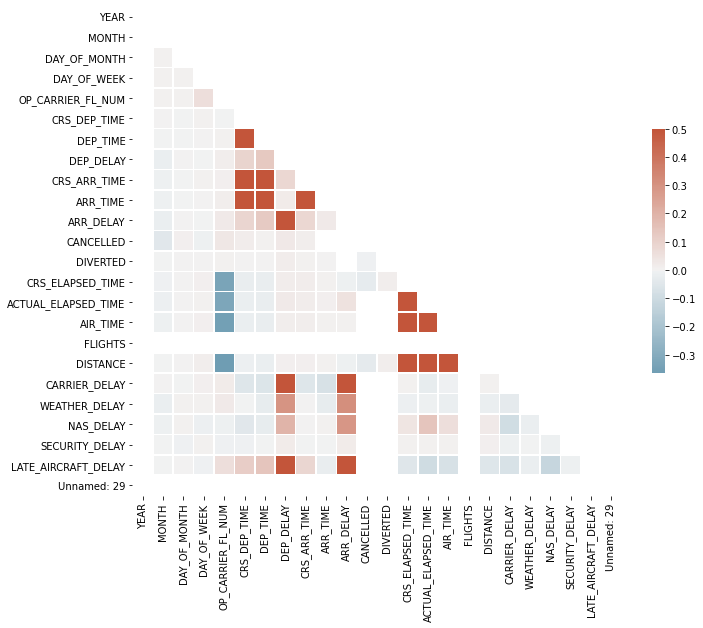

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Data CLeaning

In [7]:
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 29'],
      dtype='object')

In [8]:
dfkn= df.drop(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'DEP_DELAY',
       'DEP_TIME', 'ARR_DELAY', 'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Unnamed: 29'], axis = 1)

In [9]:
dfkn.head()

,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLATION_CODE
0,537,713,NaN
1,537,713,NaN
2,537,713,NaN
3,537,713,NaN
4,537,713,B


In [10]:
dfkn.isnull().sum()

CRS_DEP_TIME               0
CRS_ARR_TIME               0
CANCELLATION_CODE    7938055
dtype: int64

### Make new data set without N/A

In [11]:
dfknn = dfkn.dropna()

In [12]:
dfknn.isnull().sum()

CRS_DEP_TIME         0
CRS_ARR_TIME         0
CANCELLATION_CODE    0
dtype: int64

### EDA

In [13]:
dfknn.head()

,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLATION_CODE
4,537,713,B
5,537,713,B
6,537,713,C
27,2046,2218,B
28,2046,2218,B


In [14]:
dfknn.shape

(153629, 3)

In [15]:
#dfknn['CRS_DEP_TIME'] = dfknn['CRS_DEP_TIME'].astype(np.uint8)
#dfknn['CRS_ARR_TIME'] = dfknn['CRS_ARR_TIME'].astype(np.uint8)

### Prep Data for K-Nearest Neighbors algorithm

In [15]:
df_data = dfknn[['CRS_DEP_TIME', 'CRS_ARR_TIME']].copy()
df_labels = dfknn[['CANCELLATION_CODE']].copy()

In [16]:
from sklearn.model_selection import train_test_split
df_data_train, df_data_test, df_labels_train, df_labels_test = train_test_split(df_data, df_labels, test_size=0.20)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_data_train)

df_data_train = scaler.transform(df_data_train)
df_data_test = scaler.transform(df_data_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(df_data_train, df_labels_train)

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [19]:
y_pred = classifier.predict(df_data_test)

### Print out confusion matrix and classification report

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(df_labels_test, y_pred))
print(classification_report(df_labels_test, y_pred))

[[ 2853  4758   440     0]
 [ 2656 12887  1121     0]
 [  805  4052  1152     0]
 [    0     2     0     0]]


/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.45      0.35      0.40      8051
           B       0.59      0.77      0.67     16664
           C       0.42      0.19      0.26      6009
           D       0.00      0.00      0.00         2

    accuracy                           0.55     30726
   macro avg       0.37      0.33      0.33     30726
weighted avg       0.52      0.55      0.52     30726



/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Find optimal k

In [21]:
X = dfknn.drop(['CANCELLATION_CODE'], axis = 1)
y = dfknn['CANCELLATION_CODE']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.5411377986070429


### Plot Accuracy of K Values

Minimum error:- 0.4431751611013474 at K = 15


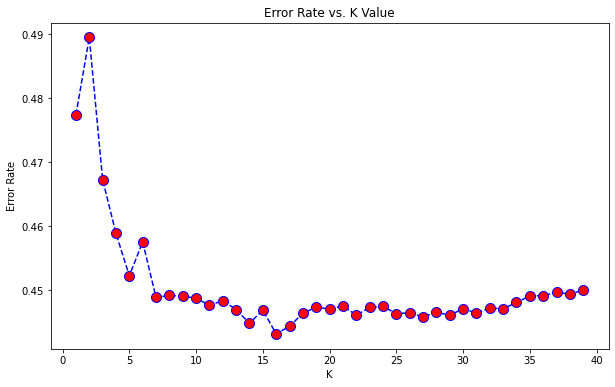

In [22]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.5568248388986526 at K = 15


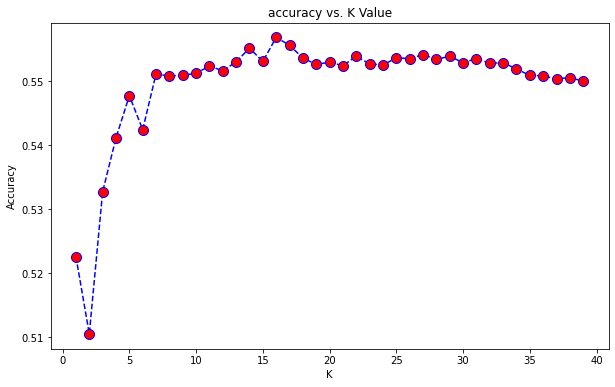

In [23]:

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
dfknn.info()

In [25]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,2019,1,16,3,2019-01-16,AA,N150UW,544,BOS,PHL,...,78.0,61.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,17,4,2019-01-17,AA,N563UW,544,BOS,PHL,...,97.0,66.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,18,5,2019-01-18,AA,N921US,544,BOS,PHL,...,90.0,66.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,19,6,2019-01-19,AA,N604AW,544,BOS,PHL,...,98.0,64.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,20,7,2019-01-20,AA,N975UY,544,BOS,PHL,...,NaN,NaN,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN


## One Hot Encoding

In [24]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['DAY_OF_WEEK'])
print(one_hot_encoded_data)

         YEAR  MONTH  DAY_OF_MONTH     FL_DATE OP_UNIQUE_CARRIER TAIL_NUM  \
0        2019      1            16  2019-01-16                AA   N150UW   
1        2019      1            17  2019-01-17                AA   N563UW   
2        2019      1            18  2019-01-18                AA   N921US   
3        2019      1            19  2019-01-19                AA   N604AW   
4        2019      1            20  2019-01-20                AA   N975UY   
...       ...    ...           ...         ...               ...      ...   
8091679  2019     12            26  2019-12-26                AA   N947NN   
8091680  2019     12            27  2019-12-27                AA   N962AN   
8091681  2019     12            28  2019-12-28                AA   N946AN   
8091682  2019     12            29  2019-12-29                AA   N801NN   
8091683  2019     12            30  2019-12-30                AA   N843NN   

         OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  ...  SECURITY_DELAY  

## Linear Regression Model

In [25]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091684 entries, 0 to 8091683
Data columns (total 36 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY_OF_MONTH         int64  
 3   FL_DATE              object 
 4   OP_UNIQUE_CARRIER    object 
 5   TAIL_NUM             object 
 6   OP_CARRIER_FL_NUM    int64  
 7   ORIGIN               object 
 8   DEST                 object 
 9   CRS_DEP_TIME         int64  
 10  DEP_TIME             float64
 11  DEP_DELAY            float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  FLIGHTS              float64
 22  DISTANCE             float64
 23  CARRIER_DELAY        float64
 24

In [71]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27]
one_hot_encoded_data.drop(one_hot_encoded_data.columns[cols],axis=1,inplace=True)

In [36]:
one_hot_encoded_data.fillna(0)


,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
0,2019,1,16,2019-01-16,AA,N150UW,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,1,0,0,0,0
1,2019,1,17,2019-01-17,AA,N563UW,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,0,1,0,0,0
2,2019,1,18,2019-01-18,AA,N921US,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,0,0,1,0,0
3,2019,1,19,2019-01-19,AA,N604AW,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,0,0,0,1,0
4,2019,1,20,2019-01-20,AA,N975UY,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091679,2019,12,26,2019-12-26,AA,N947NN,1583,PHX,ORD,1820,...,0.0,12.0,0.0,0,0,0,1,0,0,0
8091680,2019,12,27,2019-12-27,AA,N962AN,1583,PHX,ORD,1820,...,0.0,0.0,0.0,0,0,0,0,1,0,0
8091681,2019,12,28,2019-12-28,AA,N946AN,1583,PHX,ORD,1820,...,0.0,38.0,0.0,0,0,0,0,0,1,0
8091682,2019,12,29,2019-12-29,AA,N801NN,1583,PHX,ORD,1820,...,0.0,0.0,0.0,0,0,0,0,0,0,1


In [44]:
encodeddf = one_hot_encoded_data.replace(np.nan, 0)

In [45]:
encodeddf.head()

,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
0,2019,1,16,2019-01-16,AA,N150UW,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,1,0,0,0,0
1,2019,1,17,2019-01-17,AA,N563UW,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,0,1,0,0,0
2,2019,1,18,2019-01-18,AA,N921US,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,0,0,1,0,0
3,2019,1,19,2019-01-19,AA,N604AW,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,0,0,0,1,0
4,2019,1,20,2019-01-20,AA,N975UY,544,BOS,PHL,537,...,0.0,0.0,0.0,0,0,0,0,0,0,1


In [46]:
encodeddf.isnull().sum()

YEAR                   0
MONTH                  0
DAY_OF_MONTH           0
FL_DATE                0
OP_UNIQUE_CARRIER      0
TAIL_NUM               0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
FLIGHTS                0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Unnamed: 29            0
DAY_OF_WEEK_1          0
DAY_OF_WEEK_2          0
DAY_OF_WEEK_3          0
DAY_OF_WEEK_4          0
DAY_OF_WEEK_5          0
DAY_OF_WEEK_6          0
DAY_OF_WEEK_7          0
dtype: int64

## Linear Regression

In [47]:
y=encodeddf[['DEP_DELAY']]
x=encodeddf.drop(['DEP_DELAY','YEAR', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE', 
                  'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'CANCELLED', 
                  'CANCELLATION_CODE', 'FLIGHTS', 'Unnamed: 29'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              DEP_DELAY   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 9.465e+06
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:58:27   Log-Likelihood:            -2.3087e+07
No. Observations:             6473347   AIC:                         4.617e+07
Df Residuals:                 6473324   BIC:                         4.617e+07
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3435    

In [12]:
feature_cols = ['CRS_DEP_TIME', 'CRS_ARR_TIME']
X = df[feature_cols] # Features
y = df.CANCELLED # Target variable

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [14]:
le = preprocessing.LabelEncoder()
X['CRS_DEP_TIME'] = le.fit_transform(X['CRS_DEP_TIME'].astype('float'))
X['CRS_ARR_TIME'] = le.fit_transform(X['CRS_ARR_TIME'].astype('float'))

<ipython-input-14-ac1b38d05432>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CRS_DEP_TIME'] = le.fit_transform(X['CRS_DEP_TIME'].astype('float'))
<ipython-input-14-ac1b38d05432>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CRS_ARR_TIME'] = le.fit_transform(X['CRS_ARR_TIME'].astype('float'))


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Model Quaility Evaluation
y_pred=logreg.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
0.9809483415318739
Classification Report:


/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99   1984381
         1.0       0.00      0.00      0.00     38540

    accuracy                           0.98   2022921
   macro avg       0.49      0.50      0.50   2022921
weighted avg       0.96      0.98      0.97   2022921

Confusion Matrix:
[[1984381       0]
 [  38540       0]]
